In [1]:
#import modules
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

#import Doubling_time.py file
import Doubling_time

In [2]:
#import all of the growth curve data from the text files

#import and rearrange text file with the growth curve
with open("platereader_data/3_22.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    overCount=0
    for row in reader:
        if overCount==0:
            header=row
            holdingDict322= {x:[] for x in header}
        else:
            count=0
            for item in row:
                holdingDict322[header[count]]+=[float(item)]
                count+=1
        overCount+=1

#import and rearrange text file with the growth curve
with open("platereader_data/4_10.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    overCount=0
    for row in reader:
        if overCount==0:
            header=row
            holdingDict410= {x:[] for x in header}
        else:
            count=0
            for item in row:
                holdingDict410[header[count]]+=[float(item)]
                count+=1
        overCount+=1

#import and rearrange text file with the growth curve
with open("platereader_data/4_12.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    overCount=0
    for row in reader:
        if overCount==0:
            header=row
            holdingDict412= {x:[] for x in header}
        else:
            count=0
            for item in row:
                holdingDict412[header[count]]+=[float(item)]
                count+=1
        overCount+=1

#import and rearrange text file with the growth curve
with open("platereader_data/7_5.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    overCount=0
    for row in reader:
        if overCount==0:
            header=row
            holdingDict75= {x:[] for x in header}
        else:
            count=0
            for item in row:
                holdingDict75[header[count]]+=[float(item)]
                count+=1
        overCount+=1

#import and rearrange text file with the growth curve
with open("platereader_data/7_20.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    overCount=0
    for row in reader:
        if overCount==0:
            header=row
            holdingDict720= {x:[] for x in header}
        else:
            count=0
            for item in row:
                holdingDict720[header[count]]+=[float(item)]
                count+=1
        overCount+=1

In [3]:
#creating excel file for E. coli and Salmonella strains

importantHolder = {}
importantHolder['min']=np.arange(0,600,30) #600
importantHolder['hour']=np.arange(0,10,0.5) #10

#background to subtract from all for 4_10
nums=[10]
letters=['B','C','D','E']
backGround=np.zeros(len(holdingDict410['B10']))
for letter in letters:
    for num in nums:
        backGround+=np.array(holdingDict410[str(letter)+str(num)])/4

#organizing E coli strains
strains=['WT', 'dfliC', 'dflgK', 'dmotA', 'dmotA dflgK']
strainNum=0
nums=range(2,6)
letters=['B','C','D','E','F']
for letter in letters:
    for num in nums:
        importantHolder['E coli' + str(strains[strainNum]) + str(num)]=(np.array(holdingDict410[str(letter)+str(num)]) - backGround)[0:20]
    strainNum+=1
        
#organizing Salmonella strains
strains=['dfliC dfljB', 'dflgK', 'dflgK dmotA','dfliC dfljB dmotA', 'WT']
strainNum=0
nums=range(6,10)
letters=['B','C','D','E', 'G']
for letter in letters:
    for num in nums:
        if letter=='G':
            importantHolder['Salmonella' + str(strains[strainNum]) + str(num)]=(np.array(holdingDict410[str(letter)+str(num-4)]) - backGround)[0:20]
        else:
            importantHolder['Salmonella' + str(strains[strainNum]) + str(num)]=(np.array(holdingDict410[str(letter)+str(num)]) - backGround)[0:20]
    strainNum+=1

#background to subtract from all for 4_12
nums=[10]
letters=['G']
backGround12=np.zeros(len(holdingDict412['G10']))
for letter in letters:
    for num in nums:
        backGround12+=np.array(holdingDict412[str(letter)+str(num)])

strains=['dmotA']
strainNum=0
nums=[11]
letters=['B','C','D','E']
for letter in letters:
    for num in nums:
        importantHolder['Salmonella' + 'dmotA' + letter]=(np.array(holdingDict412[str(letter)+str(num)]) - backGround12)[0:20]


#Saving this as an excel file for doubling time calculations for Figure 1
df = pd.DataFrame(data=importantHolder)
print (df)

df.to_excel('calculated_doubling_times/input/overallStrainGrowth.xlsx', index=False)

    min  hour  E coliWT2  E coliWT3  E coliWT4  E coliWT5  E colidfliC2  \
0     0   0.0    0.02225    0.02525    0.02625    0.02625       0.02125   
1    30   0.5    0.05900    0.06700    0.06300    0.06700       0.04400   
2    60   1.0    0.15475    0.16575    0.17175    0.17175       0.11075   
3    90   1.5    0.28225    0.31225    0.33025    0.31525       0.20925   
4   120   2.0    0.47425    0.51225    0.57125    0.50525       0.33925   
5   150   2.5    0.60750    0.62350    0.66950    0.63450       0.48350   
6   180   3.0    0.65900    0.64500    0.68300    0.66300       0.54700   
7   210   3.5    0.63950    0.67150    0.74850    0.65250       0.58050   
8   240   4.0    0.62975    0.67475    0.71875    0.67475       0.62675   
9   270   4.5    0.65275    0.72275    0.74375    0.69175       0.62875   
10  300   5.0    0.69925    0.72925    0.72325    0.69225       0.62625   
11  330   5.5    0.70050    0.73450    0.73350    0.70750       0.63450   
12  360   6.0    0.70825 

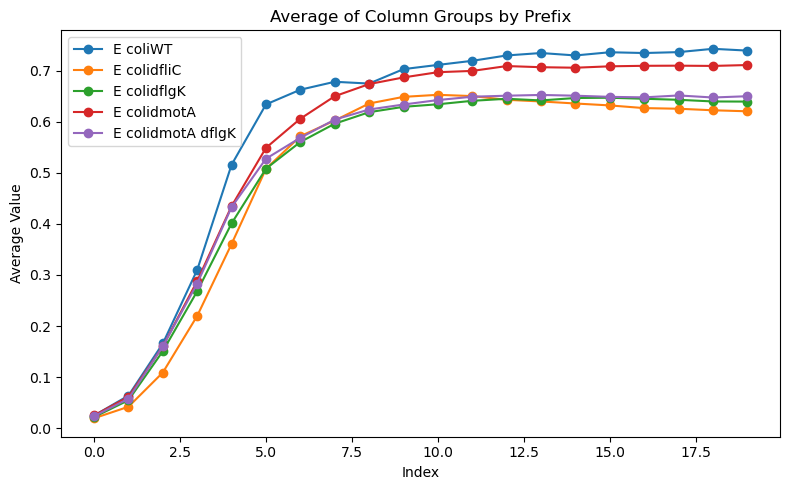

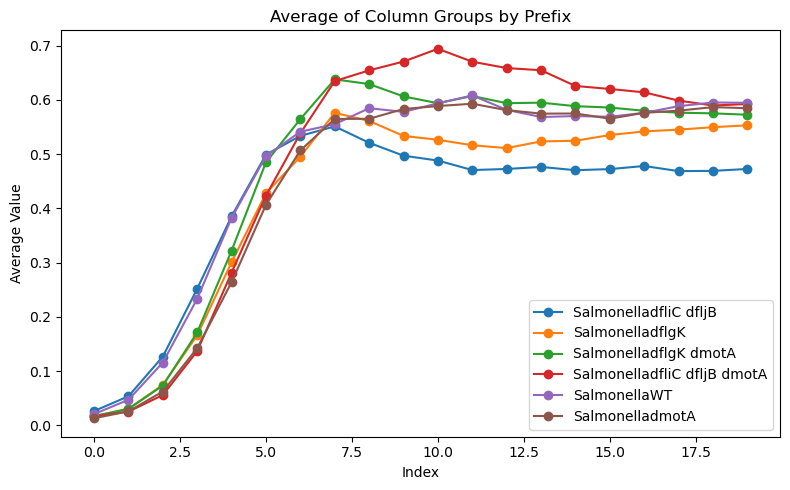

In [4]:
from collections import defaultdict

# Group column names by prefix
groups = defaultdict(list)
for col in df.columns:
    prefix = col[:-1]
    groups[prefix].append(col)

# Compute means for each group
averaged_df = pd.DataFrame()
for prefix, cols in groups.items():
    averaged_df[prefix] = df[cols].mean(axis=1)

# Plot
plt.figure(figsize=(8, 5))
for col in averaged_df.columns:
    if col[0:5] == 'E col':
        plt.plot(averaged_df.index, averaged_df[col], marker='o', label=col)
    else:
        continue
plt.xlabel("Index")
plt.ylabel("Average Value")
plt.title("Average of Column Groups by Prefix")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
for col in averaged_df.columns:
    if (col[0:5] != 'E col') and (col[0:2] != 'mi') and (col[0:3] != 'hou'):
        plt.plot(averaged_df.index, averaged_df[col], marker='o', label=col)
    else:
        continue
plt.xlabel("Index")
plt.ylabel("Average Value")
plt.title("Average of Column Groups by Prefix")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
#organizing E. coli WT with Tween growth curves

EcoliwtTweenGrowth={}
EcoliwtTweenGrowth['min']=np.arange(0,600,30)
EcoliwtTweenGrowth['hour']=np.arange(0,10,0.5)

strains=['4', '5', '6', '7', '8']
strainNum=0
nums=np.arange(2,11,2)
print(nums)
letters=['A', 'B','C','D']
timeOfHalfs={name:[] for name in strains}
for num in nums:
    for letter in letters:
        EcoliwtTweenGrowth['Ecoliwt' + strains[strainNum] + letter]=(np.array(holdingDict322[str(letter)+str(num)]) - np.array(holdingDict322['H'+str(12)]))[0:20]
    strainNum+=1

strains=['0','150', '250']
strainNum=0
nums=range(6,9)
letters=['B','C','D', 'E'] 
timeOfHalfs={name:[] for name in strains}
for num in nums:
    for letter in letters:
        EcoliwtTweenGrowth['Ecoliwt' + str(strains[strainNum]) + letter]=(np.array(holdingDict720[str(letter)+str(num)]) - np.array(holdingDict720[str('F')+str(num)]))[0:20]
    strainNum+=1

#Now saving this as a excel file
df = pd.DataFrame(data=EcoliwtTweenGrowth)
print (df)

df.to_excel('calculated_doubling_times/input/ecoliwtTweenGrowth.xlsx', index=False)

[ 2  4  6  8 10]
    min  hour  Ecoliwt4A  Ecoliwt4B  Ecoliwt4C  Ecoliwt4D  Ecoliwt5A  \
0     0   0.0      0.034      0.028      0.032      0.031      0.043   
1    30   0.5      0.086      0.076      0.083      0.079      0.099   
2    60   1.0      0.191      0.177      0.196      0.191      0.222   
3    90   1.5      0.291      0.275      0.300      0.302      0.337   
4   120   2.0      0.391      0.378      0.402      0.408      0.446   
5   150   2.5      0.465      0.448      0.484      0.481      0.524   
6   180   3.0      0.494      0.481      0.520      0.509      0.558   
7   210   3.5      0.515      0.500      0.544      0.525      0.578   
8   240   4.0      0.522      0.511      0.556      0.539      0.582   
9   270   4.5      0.533      0.519      0.565      0.543      0.583   
10  300   5.0      0.535      0.524      0.565      0.550      0.593   
11  330   5.5      0.533      0.524      0.569      0.553      0.599   
12  360   6.0      0.540      0.530      0.573 

In [6]:
#organizing E. coli dflgK with Tween growth curves

EcoliflgKTweenGrowth={}
EcoliflgKTweenGrowth['min']=np.arange(0,600,30)
EcoliflgKTweenGrowth['hour']=np.arange(0,10,0.5)

#E. coli flgK Tween -- smaller
strains=['0', '4', '5', '6', '7', '8']
strainNum=0
nums=range(2,6)
letters=['B','C','D','E','F', 'G']
timeOfHalfs={name:[] for name in strains}
for letter in letters:
    for num in nums:
        EcoliflgKTweenGrowth['Ecoliflgk' + strains[strainNum] + str(num) + '1']=(np.array(holdingDict412[str(letter)+str(num)]) - np.array(holdingDict412[str(letter)+str(10)]))[0:20]
    strainNum+=1


strains=['0','150', '250']
strainNum=0
nums=range(2,5)
letters=['B','C','D', 'E'] 
timeOfHalfs={name:[] for name in strains}
for num in nums:
    for letter in letters:
        EcoliflgKTweenGrowth['Ecoliflgk' + str(strains[strainNum]) + letter + '2']=(np.array(holdingDict720[str(letter)+str(num)]) - np.array(holdingDict720[str('F')+str(num)]))[0:20]
    strainNum+=1

#Now saving this as a excel file
df = pd.DataFrame(data=EcoliflgKTweenGrowth)
print (df)

df.to_excel('calculated_doubling_times/input/ecoliflgKTweenGrowth.xlsx', index=False)

    min  hour  Ecoliflgk021  Ecoliflgk031  Ecoliflgk041  Ecoliflgk051  \
0     0   0.0         0.015         0.022         0.016         0.023   
1    30   0.5         0.037         0.046         0.037         0.051   
2    60   1.0         0.107         0.134         0.106         0.144   
3    90   1.5         0.217         0.257         0.219         0.282   
4   120   2.0         0.358         0.414         0.360         0.449   
5   150   2.5         0.491         0.548         0.494         0.581   
6   180   3.0         0.572         0.602         0.562         0.640   
7   210   3.5         0.604         0.626         0.607         0.659   
8   240   4.0         0.629         0.670         0.632         0.678   
9   270   4.5         0.639         0.676         0.647         0.696   
10  300   5.0         0.645         0.684         0.661         0.698   
11  330   5.5         0.644         0.690         0.667         0.706   
12  360   6.0         0.650         0.691         0

In [7]:
#organizing Salmonella WT with Tween growth curves

SalmwtTweenGrowth={}
SalmwtTweenGrowth['min']=np.arange(0,600,30)
SalmwtTweenGrowth['hour']=np.arange(0,10,0.5)

'''strains=['4', '5', '6', '7', '8']
strainNum=0
nums=np.arange(1,10,2)
print(nums)
letters=['A', 'B','C','D'] #['A', 'B','C','D','E','F', 'G']
for num in nums:
    for letter in letters:
        SalmwtTweenGrowth['Salmonellawt' + strains[strainNum] + letter]=(np.array(holdingDict322[str(letter)+str(num)]) - np.array(holdingDict322['H'+str(12)]))[0:20]
    strainNum+=1'''
    
strains=[0,0.4,0.8,1.5,2.3,4.5, 9.2,19,38,76]
strainNum=0
nums=np.arange(7,12)
print(nums)
letters1=['A', 'B','C'] #['A', 'B','C','D','E','F', 'G']
letters2=['E','F', 'G']
for num in nums:
    for letter in letters1:
        SalmwtTweenGrowth['Salmonellawt' + str(strains[strainNum]) + letter]=(np.array(holdingDict75[str(letter)+str(num)]) - np.array(holdingDict75['D'+str(4)]))[0:20]
    strainNum+=1
    for letter in letters2:
        SalmwtTweenGrowth['Salmonellawt' + str(strains[strainNum]) + letter]=(np.array(holdingDict75[str(letter)+str(num)]) - np.array(holdingDict75['D'+str(4)]))[0:20]
    strainNum+=1

#Now saving this as a excel file
df = pd.DataFrame(data=SalmwtTweenGrowth)
print (df)

df.to_excel('calculated_doubling_times/input/SalmwtGrowth.xlsx', index=False)

[ 7  8  9 10 11]
    min  hour  Salmonellawt0A  Salmonellawt0B  Salmonellawt0C  \
0     0   0.0           0.012           0.011           0.013   
1    30   0.5           0.028           0.024           0.028   
2    60   1.0           0.065           0.058           0.072   
3    90   1.5           0.141           0.136           0.181   
4   120   2.0           0.259           0.249           0.284   
5   150   2.5           0.365           0.350           0.382   
6   180   3.0           0.450           0.471           0.453   
7   210   3.5           0.502           0.512           0.490   
8   240   4.0           0.473           0.489           0.485   
9   270   4.5           0.466           0.472           0.480   
10  300   5.0           0.498           0.493           0.493   
11  330   5.5           0.502           0.516           0.523   
12  360   6.0           0.536           0.526           0.520   
13  390   6.5           0.543           0.504           0.510   
14  420 

In [8]:
#organizing Salmonella dflgK with Tween growth curves

SalmflgKTweenGrowth={}
SalmflgKTweenGrowth['min']=np.arange(0,600,30)
SalmflgKTweenGrowth['hour']=np.arange(0,10,0.5)

strains=[0,0.4,0.8,1.2,1.5,1.9,2.3,2.7,3.1,3.4,3.8]
strainNum=0
nums=np.arange(1,12)
letters1=['A', 'B','C'] 
letters2=['E','F', 'G']
for num in nums:
    for letter in letters1:
        SalmflgKTweenGrowth['Salmonellaflgk' + str(strains[strainNum]) + letter]=(np.array(holdingDict75[str(letter)+str(num)]) - np.array(holdingDict75['D'+str(4)]))[0:20]
    strainNum+=1
    if strainNum==len(strains):
        break
    for letter in letters2:
        SalmflgKTweenGrowth['Salmonellaflgk' + str(strains[strainNum]) + letter]=(np.array(holdingDict75[str(letter)+str(num)]) - np.array(holdingDict75['D'+str(4)]))[0:20]
    strainNum+=1
    if strainNum==len(strains):
        break

#Now saving this as a excel file
df = pd.DataFrame(data=SalmflgKTweenGrowth)
print (df)

df.to_excel('calculated_doubling_times/input/SalmflgKGrowth.xlsx', index=False)

    min  hour  Salmonellaflgk0A  Salmonellaflgk0B  Salmonellaflgk0C  \
0     0   0.0             0.010             0.013             0.012   
1    30   0.5             0.017             0.021             0.020   
2    60   1.0             0.037             0.043             0.043   
3    90   1.5             0.081             0.092             0.095   
4   120   2.0             0.159             0.173             0.174   
5   150   2.5             0.247             0.274             0.273   
6   180   3.0             0.331             0.364             0.366   
7   210   3.5             0.387             0.419             0.427   
8   240   4.0             0.410             0.445             0.459   
9   270   4.5             0.418             0.448             0.465   
10  300   5.0             0.410             0.458             0.499   
11  330   5.5             0.405             0.501             0.517   
12  360   6.0             0.402             0.513             0.514   
13  39

In [9]:
#now calculating and saving all of the doubling times from the above made excel files

data = Doubling_time.GrowthCurve()
data.read_data("calculated_doubling_times/input/overallStrainGrowth.xlsx")
data.fit_sigmoid(plot=False)
data.show_result()
data.save_result("calculated_doubling_times/output/overallStrainGrowth_output.xlsx")

data = Doubling_time.GrowthCurve()
data.read_data("calculated_doubling_times/input/ecoliwtTweenGrowth.xlsx")
data.fit_sigmoid(plot=False)
data.show_result()
data.save_result("calculated_doubling_times/output/ecoliwtTweenGrowth_output.xlsx")

data = Doubling_time.GrowthCurve()
data.read_data("calculated_doubling_times/input/ecoliflgKTweenGrowth.xlsx")
data.fit_sigmoid(plot=False)
data.show_result()
data.save_result("calculated_doubling_times/output/ecoliflgKTweenGrowth_output.xlsx")

data = Doubling_time.GrowthCurve()
data.read_data("calculated_doubling_times/input/SalmwtGrowth.xlsx")
data.fit_sigmoid(plot=False)
data.show_result()
data.save_result("calculated_doubling_times/output/SalmwtGrowth_output.xlsx")

data = Doubling_time.GrowthCurve()
data.read_data("calculated_doubling_times/input/SalmflgKGrowth.xlsx")
data.fit_sigmoid(plot=False)
data.show_result()
data.save_result("calculated_doubling_times/output/SalmflgKGrowth_output.xlsx")

Import data successful!
Input samples are: E coliWT2,E coliWT3,E coliWT4,E coliWT5,E colidfliC2,E colidfliC3,E colidfliC4,E colidfliC5,E colidflgK2,E colidflgK3,E colidflgK4,E colidflgK5,E colidmotA2,E colidmotA3,E colidmotA4,E colidmotA5,E colidmotA dflgK2,E colidmotA dflgK3,E colidmotA dflgK4,E colidmotA dflgK5,SalmonelladfliC dfljB6,SalmonelladfliC dfljB7,SalmonelladfliC dfljB8,SalmonelladfliC dfljB9,SalmonelladflgK6,SalmonelladflgK7,SalmonelladflgK8,SalmonelladflgK9,SalmonelladflgK dmotA6,SalmonelladflgK dmotA7,SalmonelladflgK dmotA8,SalmonelladflgK dmotA9,SalmonelladfliC dfljB dmotA6,SalmonelladfliC dfljB dmotA7,SalmonelladfliC dfljB dmotA8,SalmonelladfliC dfljB dmotA9,SalmonellaWT6,SalmonellaWT7,SalmonellaWT8,SalmonellaWT9,SalmonelladmotAB,SalmonelladmotAC,SalmonelladmotAD,SalmonelladmotAE
Results saved. Good day!
Import data successful!
Input samples are: Ecoliwt4A,Ecoliwt4B,Ecoliwt4C,Ecoliwt4D,Ecoliwt5A,Ecoliwt5B,Ecoliwt5C,Ecoliwt5D,Ecoliwt6A,Ecoliwt6B,Ecoliwt6C,Ecoliwt6D,Ecoli

In [10]:
#now on to creating all of the required graphs

{'E coliWT': [], 'E colidfliC': [], 'E colidflgK': [], 'E colidmotA': [], 'E colidmotA dflgK': [], 'SalmonelladfliC dfljB': [], 'SalmonelladflgK': [], 'SalmonelladflgK dmotA': [], 'SalmonelladfliC dfljB dmotA': [], 'SalmonellaWT': [], 'SalmonelladmotA': []}
{'E coliWT': [21.559, 21.668, 21.12, 21.524], 'E colidfliC': [23.796, 20.892, 22.978, 22.225], 'E colidflgK': [21.272, 22.117, 20.137, 19.772], 'E colidmotA': [21.402, 21.77, 21.906, 21.836], 'E colidmotA dflgK': [19.528, 20.746, 20.512, 20.0], 'SalmonelladfliC dfljB': [24.327, 23.654, 23.241, 22.126], 'SalmonelladflgK': [21.439, 21.431, 24.775, 22.718], 'SalmonelladflgK dmotA': [22.776, 20.299, 21.5, 22.778], 'SalmonelladfliC dfljB dmotA': [21.022, 23.26, 21.806, 23.508], 'SalmonellaWT': [22.281, 24.945, 24.643, 20.312], 'SalmonelladmotA': [21.618, 22.273, 23.714, 23.619]}


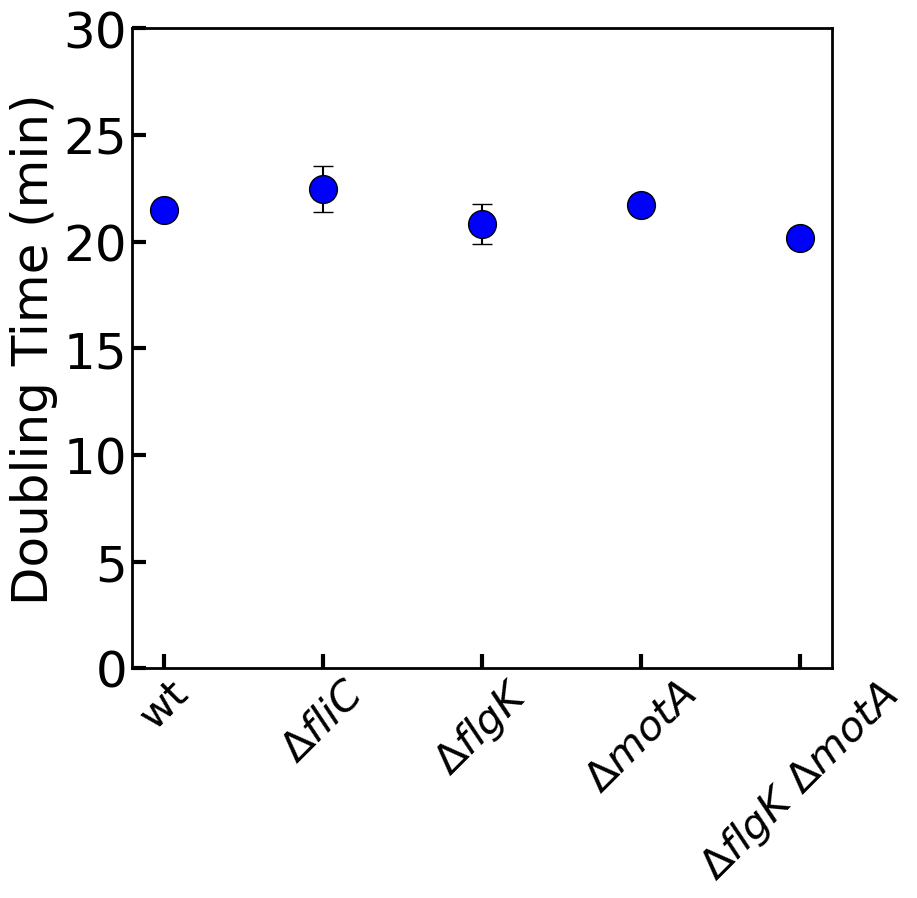

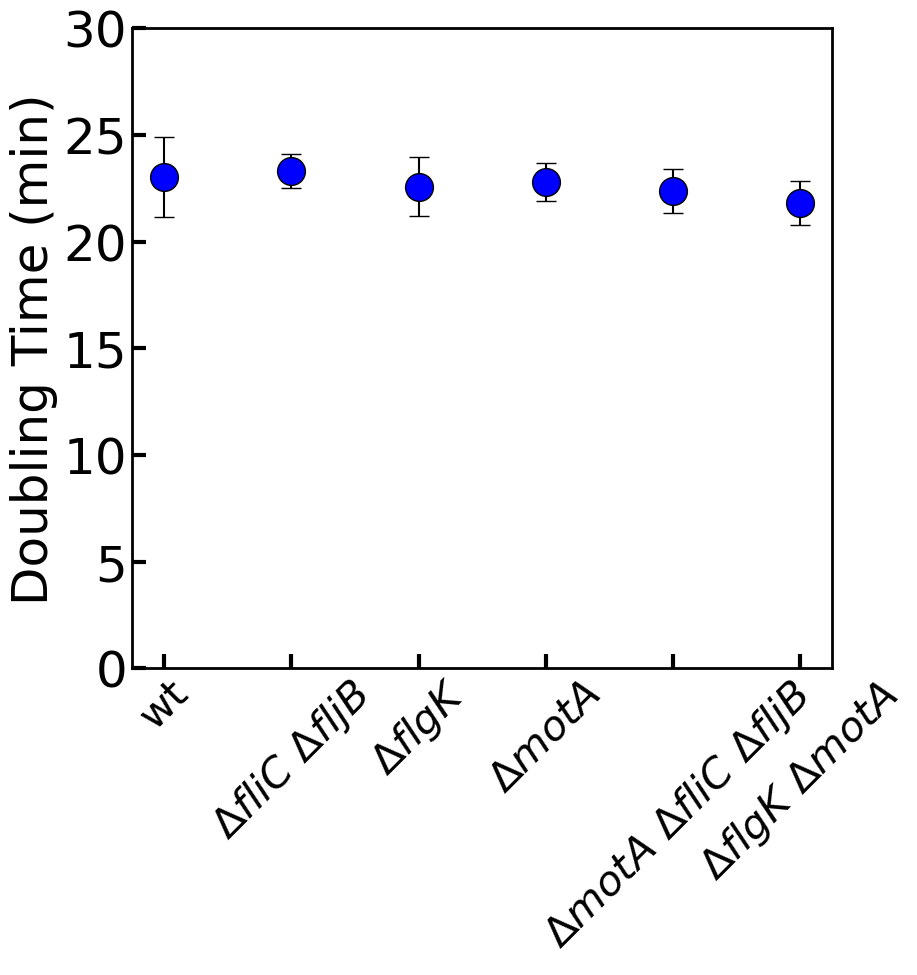

In [11]:
#first E. coli and Salmonella base strains

df = pd.read_excel("calculated_doubling_times/output/overallStrainGrowth_output.xlsx")
FinalResult={i[:-1]:[] for i in df['strain']}
print(FinalResult)

for key, value in zip(df['strain'], df['doubling time (min)']): 
    FinalResult[key[:-1]]+=[value]
print(FinalResult)

#E. coli strains -- growth rate only plot

arraysGrowthRate =[ FinalResult['E coliWT'], FinalResult['E colidfliC'], FinalResult['E colidflgK'], FinalResult['E colidmotA'], FinalResult['E colidmotA dflgK']]

fig = plt.figure(figsize=(14,8))
ax = plt.axes((0.1,0.1,0.5,0.8))

ax.tick_params(axis='x', direction='in', labelsize=30, width=3, length=10)
ax.tick_params(axis='y', direction='in', labelsize=30, width=3, length=10)

ydata = [np.average(x) for x in arraysGrowthRate]
error = [np.std(x) for x in arraysGrowthRate]

ax.errorbar(np.arange(1,6), ydata, yerr = error,  marker="o", markeredgecolor='k', markersize=20, linestyle='None', color='blue', ecolor='black', capsize=7)

ax.set_xticks(range(1, 5 + 1), [f'{i}' for i in ['wt', '$\Delta fliC$', '$\Delta flgK$', '$\Delta motA$', '$\Delta flgK\ \Delta motA$']], rotation=45, fontsize=30)
plt.yticks(fontsize=36)

ax.set_ylim(0,30)
ax.set_ylabel("Doubling Time (min)", fontsize=36)
ax.spines['bottom'].set_linewidth(2)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(2)    # Make the y-axis line thicker
ax.spines['top'].set_linewidth(2)  # Make the x-axis line thicker
ax.spines['right'].set_linewidth(2)    # Make the y-axis line thicker
plt.savefig("doubling_time_plots/ecoli_growth.svg", dpi=300, bbox_inches='tight')
plt.show()

#Salmonella strains -- growth rate only plot

arraysGrowthRate =[ FinalResult['SalmonellaWT'], FinalResult['SalmonelladfliC dfljB'], FinalResult['SalmonelladflgK'], 
FinalResult['SalmonelladmotA'], FinalResult['SalmonelladfliC dfljB dmotA'], FinalResult['SalmonelladflgK dmotA']]

fig = plt.figure(figsize=(14,8))
ax = plt.axes((0.1,0.1,0.5,0.8))

'''ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')'''
ax.tick_params(axis='x', direction='in', labelsize=30, width=3, length=10)
ax.tick_params(axis='y', direction='in', labelsize=30, width=3, length=10)

ydata = [np.average(x) for x in arraysGrowthRate]
error = [np.std(x) for x in arraysGrowthRate]

ax.errorbar(np.arange(1,7), ydata, yerr = error,  marker="o", markeredgecolor='k', markersize=20, linestyle='None', color='blue', ecolor='black', capsize=7)

ax.set_xticks(range(1, 7), [f'{i}' for i in ['wt', '$\Delta fliC\ \Delta fljB$', '$\Delta flgK$', '$\Delta motA$', ' $\Delta motA\  \Delta fliC\ \Delta fljB$', '$\Delta flgK\ \Delta motA$']], rotation=45, fontsize=30)
plt.yticks(fontsize=36)

ax.set_ylim(0,30)
ax.set_ylabel("Doubling Time (min)", fontsize=36)
ax.spines['bottom'].set_linewidth(2)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(2)    # Make the y-axis line thicker
ax.spines['top'].set_linewidth(2)  # Make the x-axis line thicker
ax.spines['right'].set_linewidth(2)    # Make the y-axis line thicker
plt.savefig("doubling_time_plots/salmonella_growth.svg", dpi=300, bbox_inches='tight')
plt.show()

{'Ecoliwt4': [], 'Ecoliwt5': [], 'Ecoliwt6': [], 'Ecoliwt7': [], 'Ecoliwt8': [], 'Ecoliwt0': [], 'Ecoliwt150': [], 'Ecoliwt250': []}
{'Ecoliwt4': [26.572, 25.272, 25.62, 23.618], 'Ecoliwt5': [25.881, 22.911, 23.221, 22.429], 'Ecoliwt6': [24.192, 25.38, 22.343, 21.539], 'Ecoliwt7': [24.264, 24.437, 23.134, 23.152], 'Ecoliwt8': [24.522, 23.033, 26.094, 24.399], 'Ecoliwt0': [19.63, 22.096, 23.255, 21.608], 'Ecoliwt150': [22.798, 21.257, 25.848, 21.079], 'Ecoliwt250': [22.359, 22.039, 21.685, 21.42]}


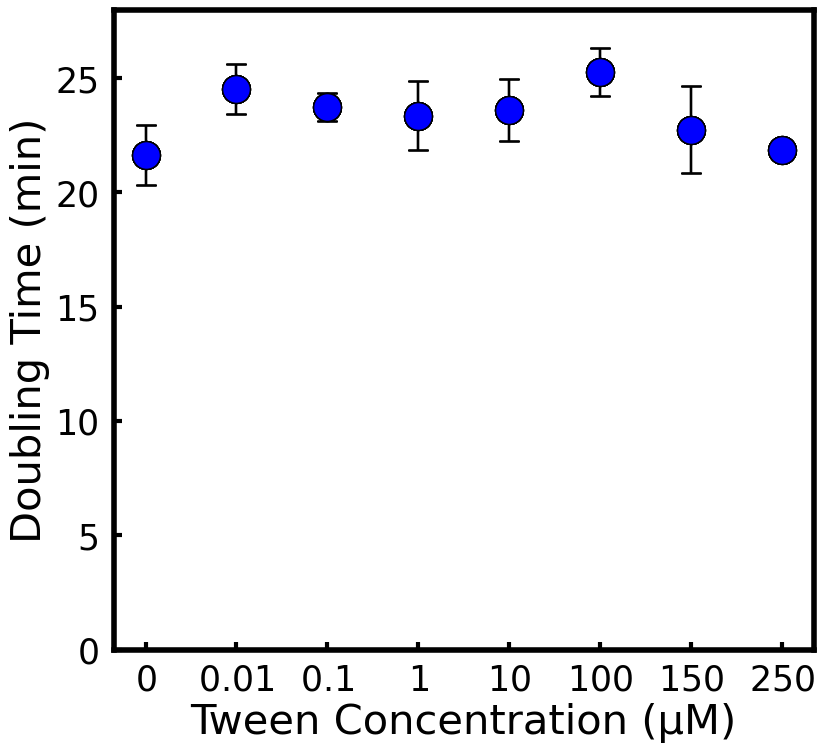

In [12]:
#now for E. coli wt

df = pd.read_excel("calculated_doubling_times/output/ecoliwtTweenGrowth_output.xlsx")
FinalResult={i[:-1]:[] for i in df['strain']}
print(FinalResult)

for key, value in zip(df['strain'], df['doubling time (min)']): 
    FinalResult[key[:-1]]+=[value]

print(FinalResult)

#e. coli Tween -- area and growth rate combined plot
arraysGrowthRatewt =[ FinalResult['Ecoliwt0'], FinalResult['Ecoliwt8'], FinalResult['Ecoliwt7'],FinalResult['Ecoliwt6'],FinalResult['Ecoliwt5'],FinalResult['Ecoliwt4'],FinalResult['Ecoliwt150'],FinalResult['Ecoliwt250'],]

fig = plt.figure(figsize=(14,8))
ax = plt.axes((0.1,0.1,0.5,0.8))

ax.tick_params(axis='x', direction='in', labelsize=30, width=3, length=6,pad=10)
ax.tick_params(axis='y', direction='in', labelsize=30, width=3, length=6,pad=10)


count=0
for x in arraysGrowthRatewt:
    ax.errorbar(x=np.arange(1,9), y=[np.average(x) for x in arraysGrowthRatewt], yerr=[np.std(x) for x in arraysGrowthRatewt],
                 marker="o", markeredgecolor='k', markersize=20, linestyle='None', color='blue', ecolor='black', capsize=7)
    count+=1

ax.set_xticks(range(1, 9), [f'{i}' for i in ['$0$', '$0.01$', '$0.1$', '$1$', '$10$', '$100$', '$150$','$250$']], fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0,28)
ax.set_ylabel("Doubling Time (min)", fontsize=30)
ax.set_xlabel("Tween Concentration (\u00B5M)", fontsize=30)
ax.spines['bottom'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(4)    # Make the y-axis line thicker
ax.spines['top'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['right'].set_linewidth(4)    # Make the y-axis line thicker
plt.savefig("doubling_time_plots/Ecoli_Tween_wt.svg", dpi=300, bbox_inches='tight')
plt.show()

{'Ecoliflgk0': [], 'Ecoliflgk4': [], 'Ecoliflgk5': [], 'Ecoliflgk6': [], 'Ecoliflgk7': [], 'Ecoliflgk8': [], 'Ecoliflgk150': [], 'Ecoliflgk250': []}
{'Ecoliflgk0': [18.773, 18.883, 18.851, 18.61, 19.849, 20.395, 22.029, 20.659], 'Ecoliflgk4': [20.23, 20.878, 20.094, 22.063], 'Ecoliflgk5': [18.153, 17.712, 17.503, 18.795], 'Ecoliflgk6': [18.374, 18.743, 17.888, 16.847], 'Ecoliflgk7': [19.996, 19.575, 19.197, 19.567], 'Ecoliflgk8': [18.346, 18.533, 19.119, 18.477], 'Ecoliflgk150': [22.104, 19.967, 20.731, 21.279], 'Ecoliflgk250': [21.856, 21.732, 20.747, 21.564]}


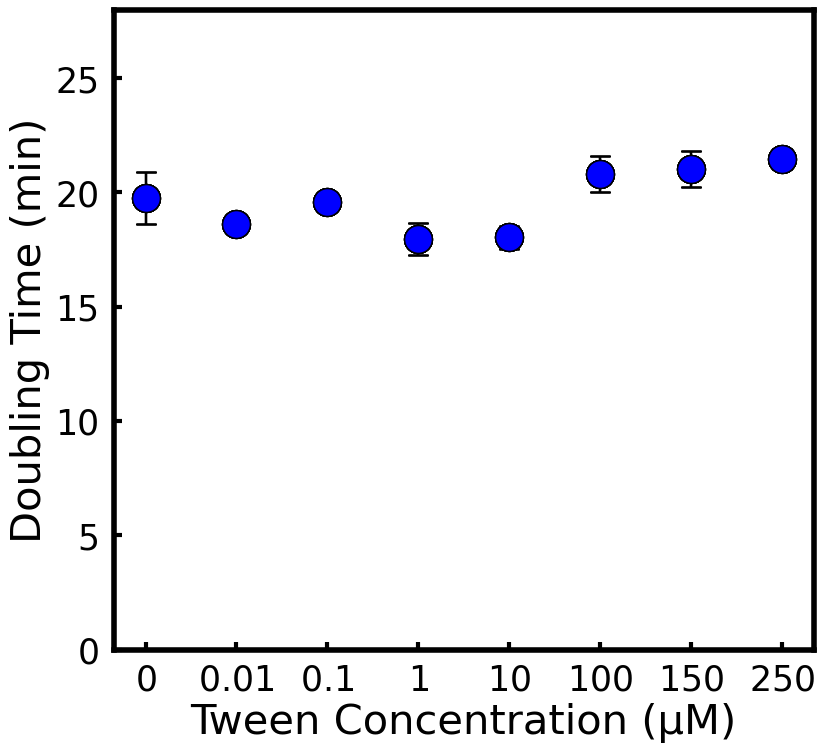

In [13]:
#now for E. coli flgK

df = pd.read_excel("calculated_doubling_times/output/ecoliflgKTweenGrowth_output.xlsx")
FinalResult={i[:-2]:[] for i in df['strain']}
print(FinalResult)

for key, value in zip(df['strain'], df['doubling time (min)']): 
    FinalResult[key[:-2]]+=[value]

print(FinalResult)

#e. coli Tween -- area and growth rate combined plot
arraysGrowthRatewt =[ FinalResult['Ecoliflgk0'], FinalResult['Ecoliflgk8'], FinalResult['Ecoliflgk7'],FinalResult['Ecoliflgk6'],FinalResult['Ecoliflgk5'],FinalResult['Ecoliflgk4'],FinalResult['Ecoliflgk150'],FinalResult['Ecoliflgk250'],]

fig = plt.figure(figsize=(14,8))
ax = plt.axes((0.1,0.1,0.5,0.8))

ax.tick_params(axis='x', direction='in', labelsize=30, width=3, length=6,pad=10)
ax.tick_params(axis='y', direction='in', labelsize=30, width=3, length=6,pad=10)


count=0
for x in arraysGrowthRatewt:
    ax.errorbar(x=np.arange(1,9), y=[np.average(x) for x in arraysGrowthRatewt], yerr=[np.std(x) for x in arraysGrowthRatewt],
                 marker="o", markeredgecolor='k', markersize=20, linestyle='None', color='blue', ecolor='black', capsize=7)
    count+=1

ax.set_xticks(range(1, 9), [f'{i}' for i in ['$0$', '$0.01$', '$0.1$', '$1$', '$10$', '$100$', '$150$','$250$']], fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0,28)
ax.set_ylabel("Doubling Time (min)", fontsize=30)
ax.set_xlabel("Tween Concentration (\u00B5M)", fontsize=30)
ax.spines['bottom'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(4)    # Make the y-axis line thicker
ax.spines['top'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['right'].set_linewidth(4)    # Make the y-axis line thicker
plt.savefig("doubling_time_plots/Ecoli_Tween_flgk.svg", dpi=300, bbox_inches='tight')
plt.show()


{'Salmonellawt0': [], 'Salmonellawt0.4': [], 'Salmonellawt0.8': [], 'Salmonellawt1.5': [], 'Salmonellawt2.3': [], 'Salmonellawt4.5': [], 'Salmonellawt9.2': [], 'Salmonellawt19': [], 'Salmonellawt38': [], 'Salmonellawt76': []}
{'Salmonellawt0': [24.238, 22.859, 20.402], 'Salmonellawt0.4': [20.102, 21.303, 21.609], 'Salmonellawt0.8': [22.209, 23.327, 20.388], 'Salmonellawt1.5': [21.972, 20.6, 22.271], 'Salmonellawt2.3': [23.315, 22.462, 21.057], 'Salmonellawt4.5': [24.777, 23.568, 25.179], 'Salmonellawt9.2': [23.19, 21.91, 21.028], 'Salmonellawt19': [21.332, 20.161, 23.038], 'Salmonellawt38': [22.29, 24.837, 22.812], 'Salmonellawt76': [22.409, 23.25, 23.285]}


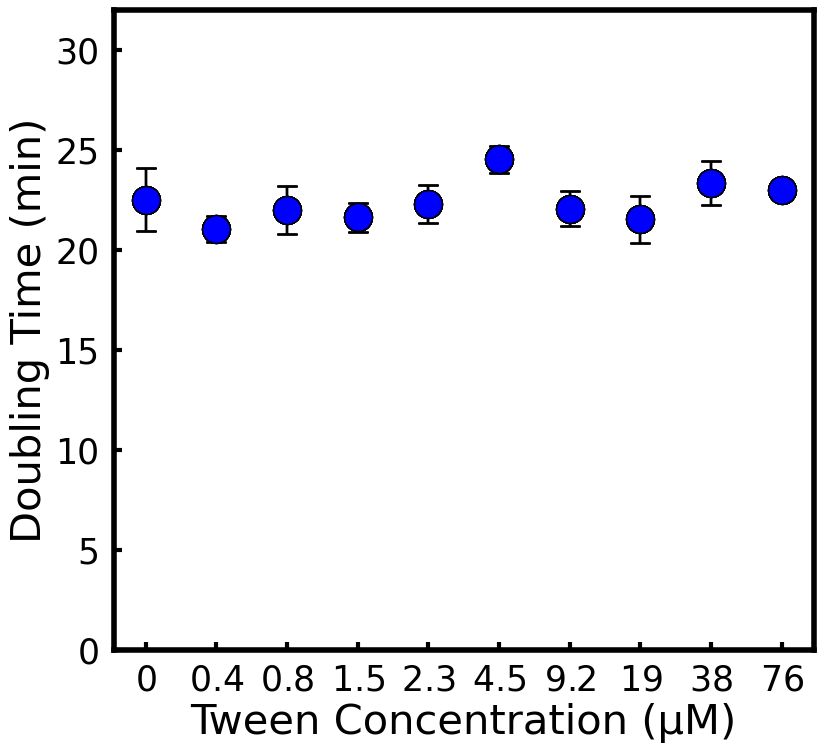

In [14]:
#now for Salmonella wt new

df = pd.read_excel("calculated_doubling_times/output/SalmwtGrowth_output.xlsx")
FinalResult={i[:-1]:[] for i in df['strain']}
print(FinalResult)

for key, value in zip(df['strain'], df['doubling time (min)']): 
    FinalResult[key[:-1]]+=[value]

print(FinalResult)
[0,0.4,0.8,1.5,2.3,4.5, 9.2,19,38,76]
#e. coli Tween -- area and growth rate combined plot
arraysGrowthRatewt =[ FinalResult['Salmonellawt0'], FinalResult['Salmonellawt0.4'], FinalResult['Salmonellawt0.8'],FinalResult['Salmonellawt1.5'],FinalResult['Salmonellawt2.3'],FinalResult['Salmonellawt4.5'], FinalResult['Salmonellawt9.2'], FinalResult['Salmonellawt19'], FinalResult['Salmonellawt38'], FinalResult['Salmonellawt76']]

fig = plt.figure(figsize=(14,8))
ax = plt.axes((0.1,0.1,0.5,0.8))

ax.tick_params(axis='x', direction='in', labelsize=30, width=3, length=6,pad=10)
ax.tick_params(axis='y', direction='in', labelsize=30, width=3, length=6,pad=10)


count=0
for x in arraysGrowthRatewt:
    ax.errorbar(x=np.arange(1,11), y=[np.average(x) for x in arraysGrowthRatewt], yerr=[np.std(x) for x in arraysGrowthRatewt],
                 marker="o", markeredgecolor='k', markersize=20, linestyle='None', color='blue', ecolor='black', capsize=7)
    count+=1

ax.set_xticks(range(1, 11), [f'{i}' for i in ['$0$', '$0.4$', '$0.8$', '$1.5$', '$2.3$','$4.5$','$9.2$','$19$','$38$','$76$']], fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0,32)
ax.set_ylabel("Doubling Time (min)", fontsize=30)
ax.set_xlabel("Tween Concentration (\u00B5M)", fontsize=30)
ax.spines['bottom'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(4)    # Make the y-axis line thicker
ax.spines['top'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['right'].set_linewidth(4)    # Make the y-axis line thicker
plt.savefig("doubling_time_plots/salm_Tween_wt.svg", dpi=300, bbox_inches='tight')
plt.show()

{'Salmonellaflgk0': [], 'Salmonellaflgk0.4': [], 'Salmonellaflgk0.8': [], 'Salmonellaflgk1.2': [], 'Salmonellaflgk1.5': [], 'Salmonellaflgk1.9': [], 'Salmonellaflgk2.3': [], 'Salmonellaflgk2.7': [], 'Salmonellaflgk3.1': [], 'Salmonellaflgk3.4': [], 'Salmonellaflgk3.8': []}
{'Salmonellaflgk0': [25.355, 26.995, 26.017], 'Salmonellaflgk0.4': [28.114, 26.401, 27.117], 'Salmonellaflgk0.8': [23.497, 26.279, 24.395], 'Salmonellaflgk1.2': [27.328, 24.771, 25.011], 'Salmonellaflgk1.5': [23.868, 25.593, 23.61], 'Salmonellaflgk1.9': [24.793, 23.488, 27.059], 'Salmonellaflgk2.3': [23.733, 23.601, 24.098], 'Salmonellaflgk2.7': [23.681, 20.559, 20.946], 'Salmonellaflgk3.1': [23.821, 24.703, 23.23], 'Salmonellaflgk3.4': [22.69, 21.563, 23.193], 'Salmonellaflgk3.8': [24.114, 25.007, 22.358]}


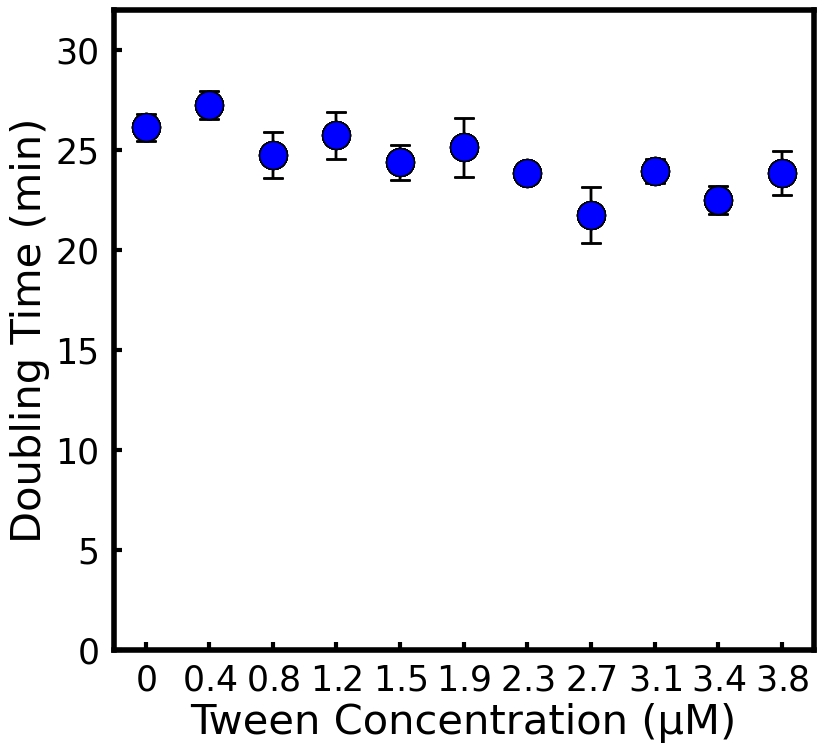

In [15]:
#now for Salmonella flgk new

df = pd.read_excel("calculated_doubling_times/output/SalmflgKGrowth_output.xlsx")
FinalResult={i[:-1]:[] for i in df['strain']}
print(FinalResult)

for key, value in zip(df['strain'], df['doubling time (min)']): 
    FinalResult[key[:-1]]+=[value]

print(FinalResult)
#e. coli Tween -- area and growth rate combined plot [0,0.4,0.8,1.2,1.5,1.9,2.3,2.7,3.1,3.4,3.8]
arraysGrowthRatewt =[ FinalResult['Salmonellaflgk0'], FinalResult['Salmonellaflgk0.4'], FinalResult['Salmonellaflgk0.8'],FinalResult['Salmonellaflgk1.2'], FinalResult['Salmonellaflgk1.5'],FinalResult['Salmonellaflgk1.9'], FinalResult['Salmonellaflgk2.3'],FinalResult['Salmonellaflgk2.7'],FinalResult['Salmonellaflgk3.1'], FinalResult['Salmonellaflgk3.4'], FinalResult['Salmonellaflgk3.8']]

fig = plt.figure(figsize=(14,8))
ax = plt.axes((0.1,0.1,0.5,0.8))

ax.tick_params(axis='x', direction='in', labelsize=30, width=3, length=6, pad=10)
ax.tick_params(axis='y', direction='in', labelsize=30, width=3, length=6, pad=10)


count=0
for x in arraysGrowthRatewt:
    ax.errorbar(x=np.arange(1,12), y=[np.average(x) for x in arraysGrowthRatewt], yerr=[np.std(x) for x in arraysGrowthRatewt],
                 marker="o", markeredgecolor='k', markersize=20, linestyle='None', color='blue', ecolor='black', capsize=7)
    count+=1

ax.set_xticks(range(1, 12), [f'{i}' for i in ['$0$', '$0.4$', '$0.8$', '$1.2$', '$1.5$', '$1.9$', '$2.3$','$2.7$', '$3.1$','$3.4$','$3.8$']], fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylim(0,32)
ax.set_ylabel("Doubling Time (min)", fontsize=30)
ax.set_xlabel("Tween Concentration (\u00B5M)", fontsize=30)
ax.spines['bottom'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(4)    # Make the y-axis line thicker
ax.spines['top'].set_linewidth(4)  # Make the x-axis line thicker
ax.spines['right'].set_linewidth(4)    # Make the y-axis line thicker
plt.savefig("doubling_time_plots/salm_Tween_flgk.svg", dpi=300, bbox_inches='tight')
plt.show()